<a href="https://colab.research.google.com/github/amanpatelll/MACHINE_LEARNING_PROJ-S/blob/LINEAR-REGRESSION/Big_Mart_MRP_xgboost_aman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AMAN PATEL Importing the packages -

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.preprocessing import LabelEncoder # used for one hot encoding , when there are too many continuous values
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor # can import xgboostclassifier for classification purposes
from sklearn import metrics


Data collection and analysis -


In [229]:
# creating a dataframe using pandas
path = '/content/Big_Mart_Sales.csv'
df=pd.read_csv(path)
# printing the first 5 rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [230]:
# printing the last 5 rows of the dataframe
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


One can observe that there are 5681 entries and 11 features including the Item_MRP that we will be predictingusing the ML model .


In [231]:
df.info() # generating information on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [232]:
df.isnull().sum()
# below you will see the number of null values in each column

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

How to handle missing values??

mean = average values
mode = most repeated value



In [233]:
# mean = average values
# mode = most repeated value
# for the item_weight column , the outlet_size contains continuous values
a=df['Item_Weight'].mean()
print(a)


12.695633368756642


In [234]:
# filling the missing values with mean of the respective column
df['Item_Weight'].fillna(a,inplace=True)

In [235]:
df.isnull().sum()
# this shows that the missing values of the item_weight have been filled

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Replacing the missing values in "Outlet_Size" column with mode -

In [236]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [237]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [238]:
miss_values = df['Outlet_Size'].isnull()
print(miss_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [239]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [240]:
df.isnull().sum()
# the output below will show that there are no more missing values in the dataframe

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Data Analysis

In [241]:
df.describe()
# gives us all the statistical data categorically

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Plotting graphs to show the distribution of each column

The plots for every column has been made , so one can clearly see how the distribution of every column follows -

In [242]:
sns.set()

<ipython-input-243-3a0463b12ef4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


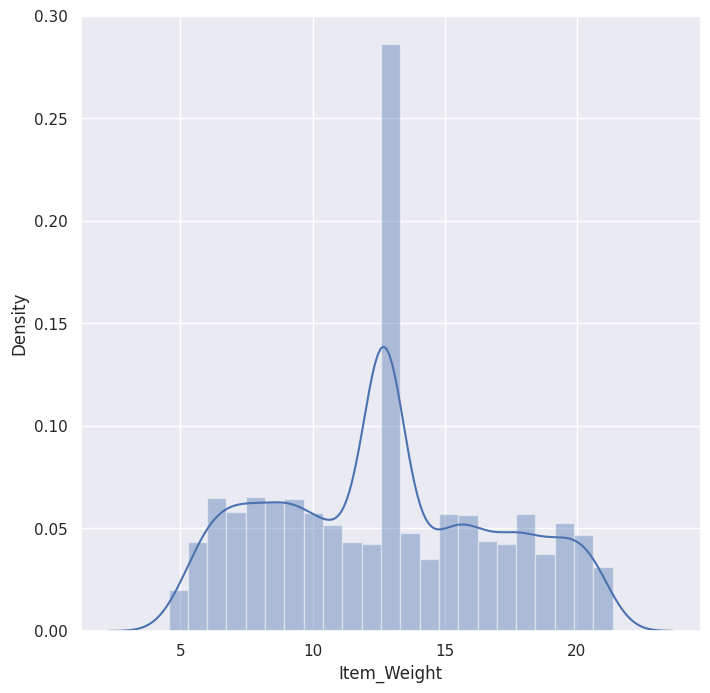

In [243]:
# item_weight distribution
plt.figure(figsize=(8,8))
sns.distplot(df['Item_Weight'])
plt.show()
# tis is how the item_weight column is distributed , it makes sense that the mean size is somewhere aroud 12.5

<ipython-input-244-84376d4d016e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


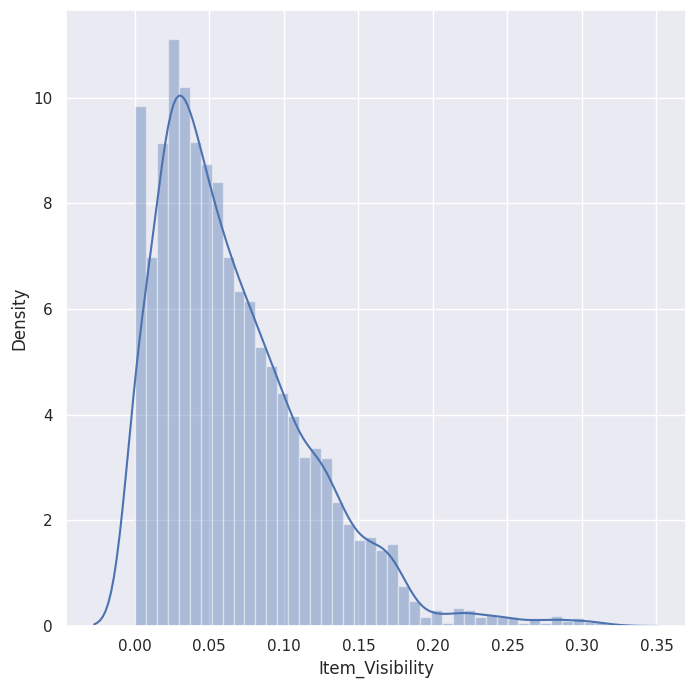

In [244]:
plt.figure(figsize=(8,8))
sns.distplot(df['Item_Visibility'])
plt.show()

<ipython-input-245-c03753b62be3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


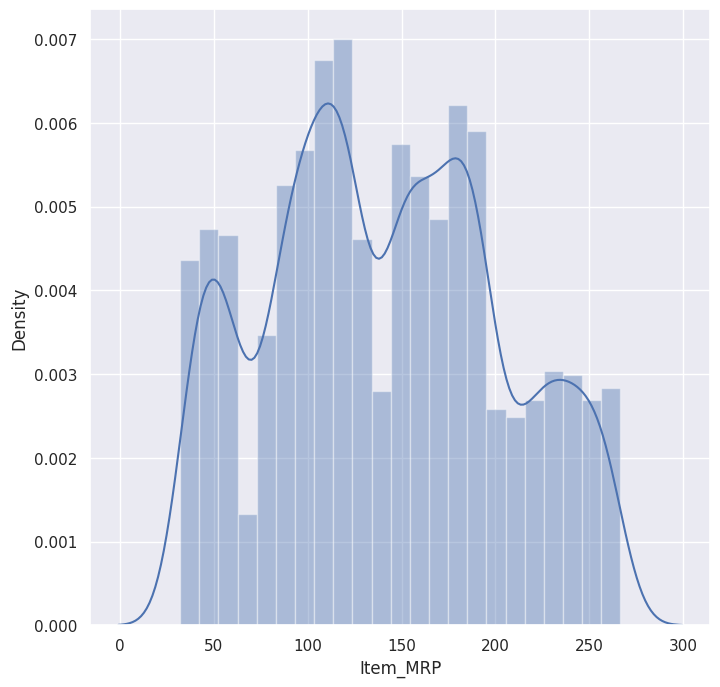

In [245]:
plt.figure(figsize=(8,8))
sns.distplot(df['Item_MRP'])
plt.show()

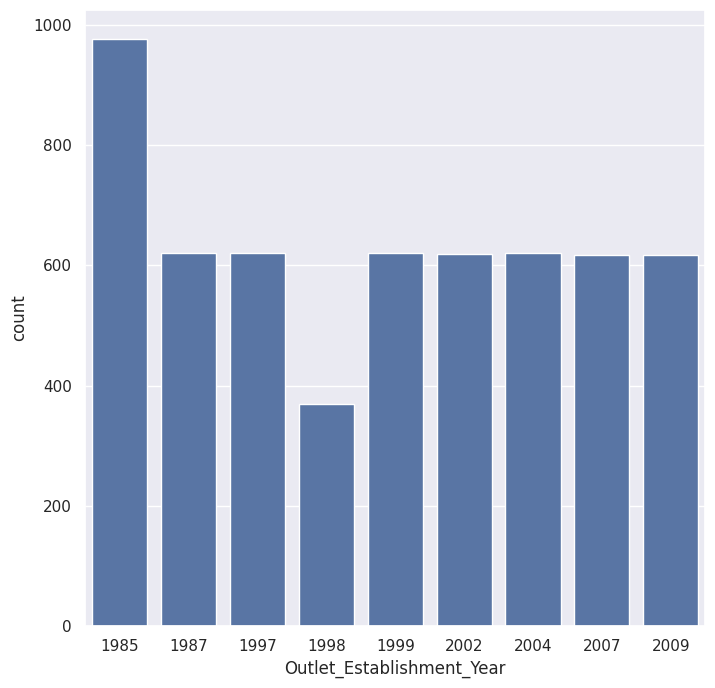

In [246]:
plt.figure(figsize=(8,8))
sns.countplot(x='Outlet_Establishment_Year',data=df) # in this case using countplot is better since the years are limited only and a very narrow distribution
plt.show()
# this gives us the distribution of yearly-sales

<function matplotlib.pyplot.show(close=None, block=None)>

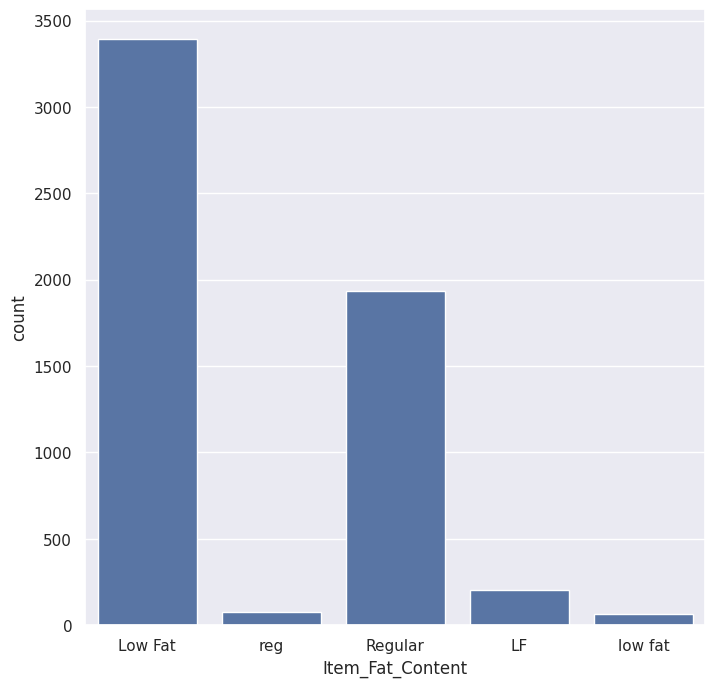

In [247]:
plt.figure(figsize=(8,8))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show

You can create plots for every column by changing the figsize

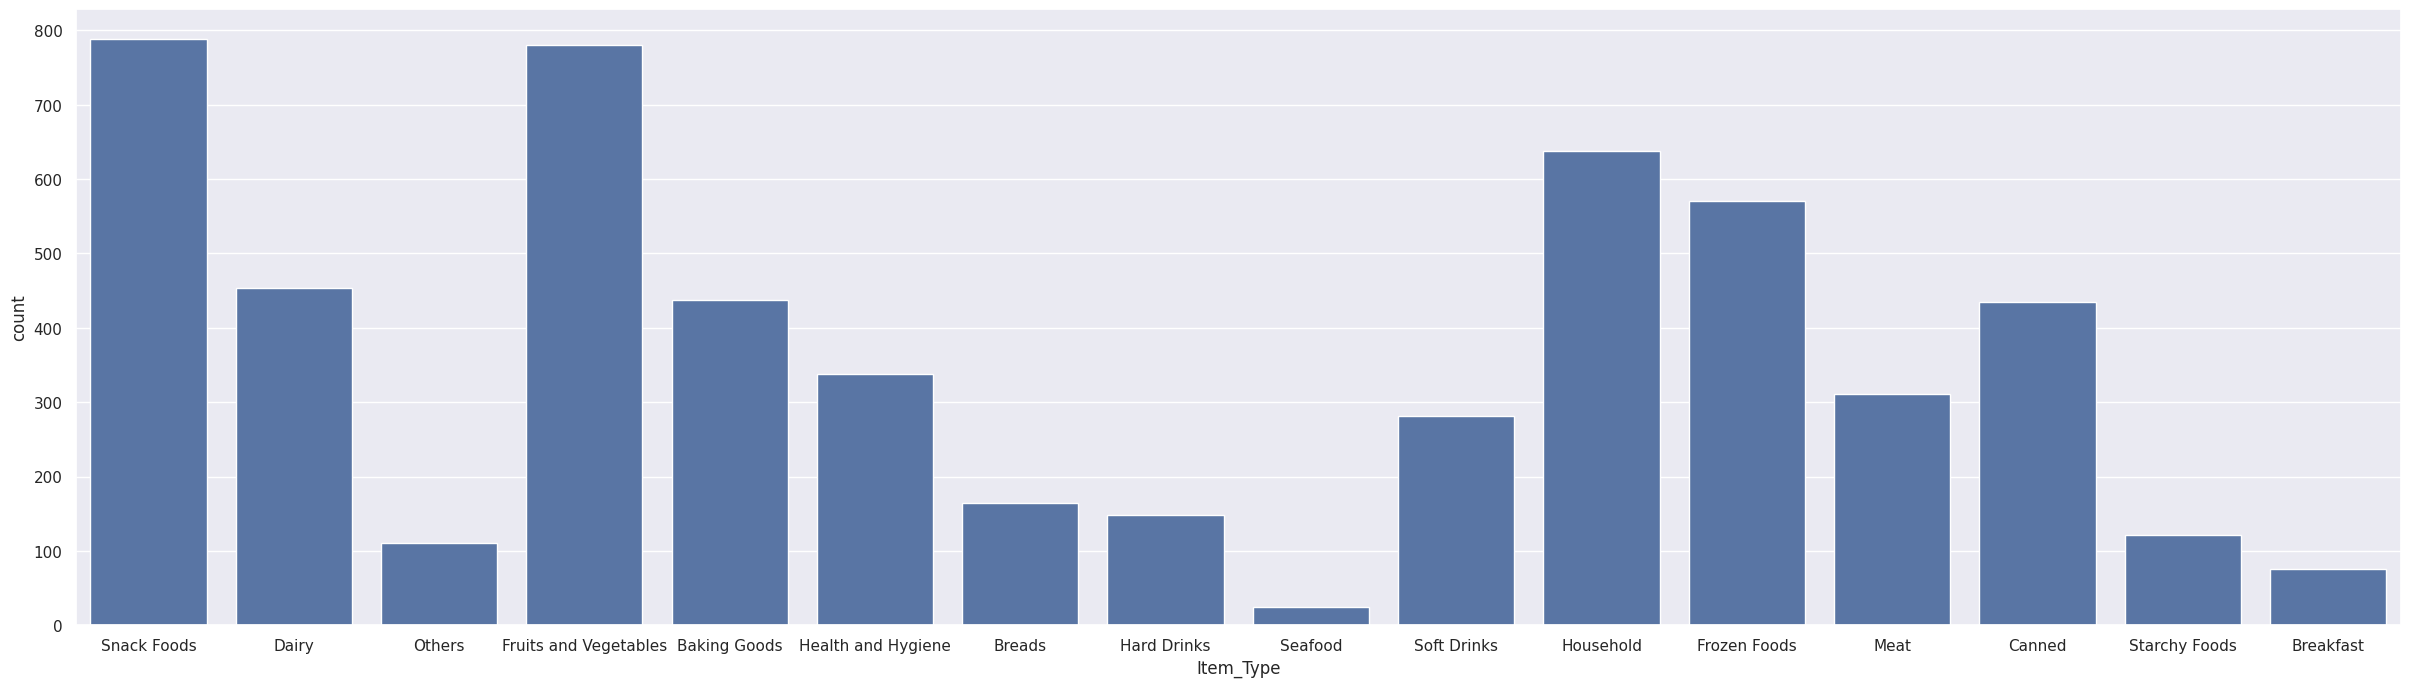

In [248]:
plt.figure(figsize=(30,8))
sns.countplot(x='Item_Type',data=df)
plt.show()

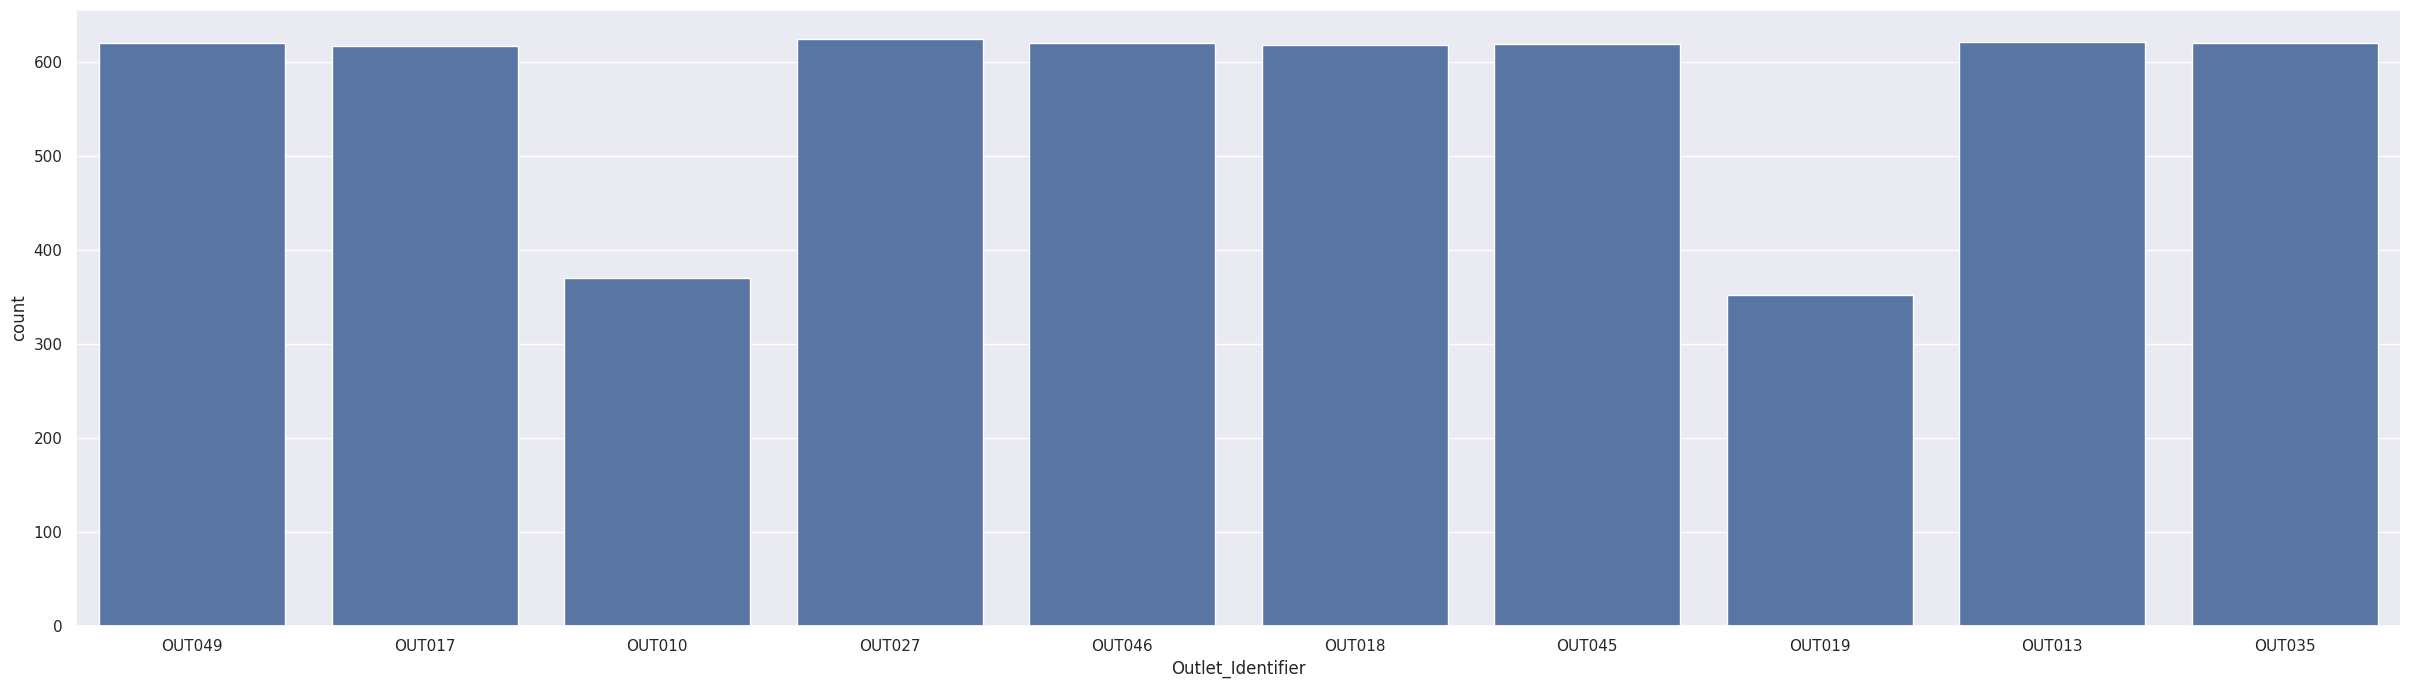

In [249]:
plt.figure(figsize=(30,8))
sns.countplot(x='Outlet_Identifier',data=df)
plt.show()

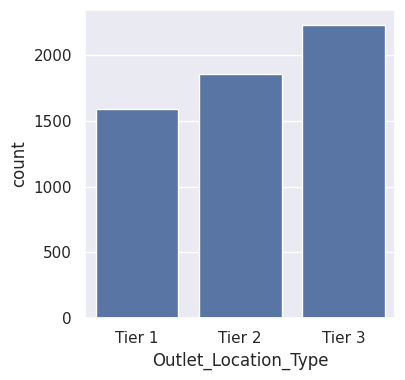

In [250]:
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.show()

In [251]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


ONE HOT ENCODING -

In [252]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [253]:
df.replace({'Item_Fat_Content':{'Low Fat':'l','LF':'l','reg':'r','Regular':'r','low fat':'l'}})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,l,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,r,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,l,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,l,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,r,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,r,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600000,r,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000000,l,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300000,r,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


In [254]:
encoder = LabelEncoder()

In [255]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

As one can see encoding has been done and all the values have been converted to numbers , now it'll be easier to perform the regression -

In [256]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


Above you'll be able to see the recommended plots as well ...

damn colab is interesting

SPLITTING INTO TRAIN AND TEST SETS AND CREATING X AND Y ARRAYS --

imp note - The dataset wasn't as expected , the output_sales column is missing so we are going to have to adjust and predict values for Item_MRP

sorry

In [257]:
X= df.drop(columns='Item_MRP')
Y=df['Item_MRP']
print(X)
print(Y)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                1103    20.750000  ...                     0            1
1                1067     8.300000  ...                     1            1
2                1406    14.600000  ...                     2            0
3                 809     7.315000  ...                     1            1
4                1184    12.695633  ...                     2            3
...               ...          ...  ...                   ...          ...
5676              231    10.500000  ...                     0            1
5677              306     7.600000  ...                     2            2
5678             1412    10.000000  ...                     1            1
5679              517    15.300000  ...                     1            1
5680              987     9.500000  ...                     1            1

[5681 rows x 10 columns]
0       107.8622
1        87.3198
2       241.7538
3       155.0340
4     

In [258]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.9,random_state=3)

MACHINE LEARNING MODEL

XGBOOSTER REGRESSOR-

In [259]:
regressor=XGBRegressor()

In [260]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [261]:
training_data_prediction=regressor.predict(X_train)
print(training_data_prediction)
# shown belowe are the predicted values of MRP
print(training_data_prediction.shape)

[122.01185  119.63571  100.255936 101.562996 233.08516   52.588104
 175.14287   96.065025  89.948555 195.79628  221.18172  112.537254
 183.47328   63.75676  224.999     61.850372 155.52234  222.03886
 101.394684 151.64926  243.22455  250.45396   55.26319  130.67921
 214.45282  106.00021  174.98546  172.96936  173.67342   74.32907
 183.47314  234.13405  117.28664  253.66037  117.76784   64.50434
  78.22253  209.29794  119.43191  107.942245 224.81772   45.646217
 127.51444   96.157196 189.53651  221.01573  106.98321  195.73535
 187.77693  151.57373  108.91586  164.83696   95.763016 108.454666
 224.50589  174.7668    64.85762   79.61821  190.66159  104.352066
  96.97323   44.84426  238.23482  214.61197   59.533966 227.95166
 103.19092   59.559937 236.70963  197.93338  151.9161   115.05498
  81.34316   81.02762  135.67068  123.4622   145.7858   165.5163
  78.80967  226.50272  194.81154  175.05003   47.72608  102.10936
 188.77353  150.74263  143.85745  261.50558   88.52542  171.79607
 212.6

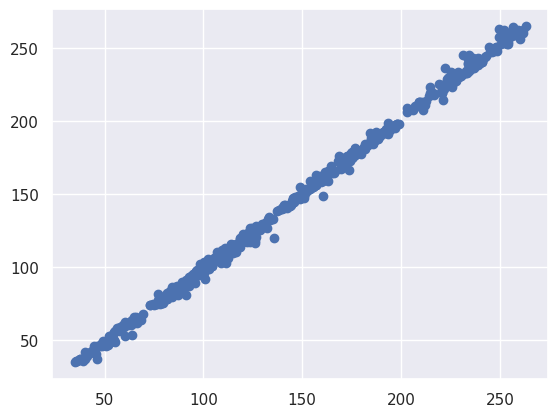

In [262]:
plt.scatter(training_data_prediction,Y_train)
# plotting a graph between the predicted MRP and the actual values that is stored in Y_train
# notice how it follows the x=y line

In [263]:
# r squared value -
r2_train=metrics.r2_score(training_data_prediction,Y_train)
print(r2_train)
# it's close to 1 , hence it's a good model

0.9973359736524042


Trying the same XGBregressor model with the test dataset

In [264]:
aman=XGBRegressor()

In [265]:
aman.fit(X_test,Y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [266]:
testing_data_prediction=aman.predict(X_test)

In [267]:
print(testing_data_prediction)

[ 99.82975 174.59607 176.32855 ... 160.14299 207.44098 221.44958]


In [268]:
r2_test=metrics.r2_score(testing_data_prediction,Y_test)

In [269]:
print(r2_test)

0.8418512219780915


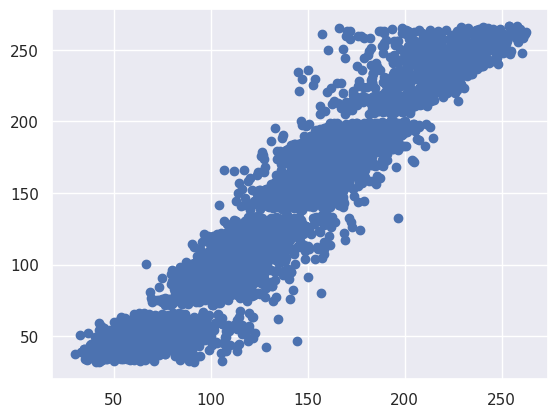

In [270]:
plt.scatter(testing_data_prediction,Y_test)
# notice how it follows the x=y line